 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")


#df = dataframe
#pase index as index and read as a true date

whale_df = pd.read_csv(whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

# read first few lines to view file
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

# use sum function to count how many

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls


whale_df = whale_df.dropna().copy()
whale_df.head()

# to check if there are any nulls left;
# whale_df.isnull().sum()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head()
# to check if there are any nulls left
# algo_df.isnull().sum()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
tsx_data = Path("Resources/sp_tsx_history.csv")

tsx_df = pd.read_csv(tsx_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
tsx_df.dtypes

# check for nulls
# tsx_df.isnull().sum()

Close    object
dtype: object

In [10]:
# Fix Data Types

# remove the $ sign from the data
tsx_df["Close"] = tsx_df["Close"].str.replace("$", "")

# remove the comma between the data
tsx_df = tsx_df.replace([","], [""], regex=True)

tsx_df["Close"]

/var/folders/0m/kwg5jt897hz3j47jzbmmz4q00000gn/T/ipykernel_33602/1738643797.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx_df["Close"] = tsx_df["Close"].str.replace("$", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [11]:
# Calculate Daily Returns

# change the closing prices to a float
tsx_df['Close'] = tsx_df['Close'].astype(float)

#calculate daily returns
tsx_daily_returns = tsx_df.pct_change()

# Tests to confirm data is working
# tsx_df.plot()
# tsx_df.dtypes
# print(tsx_df)

tsx_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
# check for nulls
tsx_daily_returns.isnull().sum()

# dropping the nulls
tsx_daily_returns = tsx_daily_returns.dropna().copy()
#tsx_daily_returns

#tsx_daily_returns.dropna(inplace=True)
tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.

tsx_daily_returns.rename(columns={'Close': 'TSX60'}, inplace=True)
tsx_daily_returns.head()


,TSX60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_rows = pd.concat(
    [whale_df, algo_df, tsx_daily_returns], axis="columns", join="inner"
)
joined_data_rows.head()
joined_data_rows.copy()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

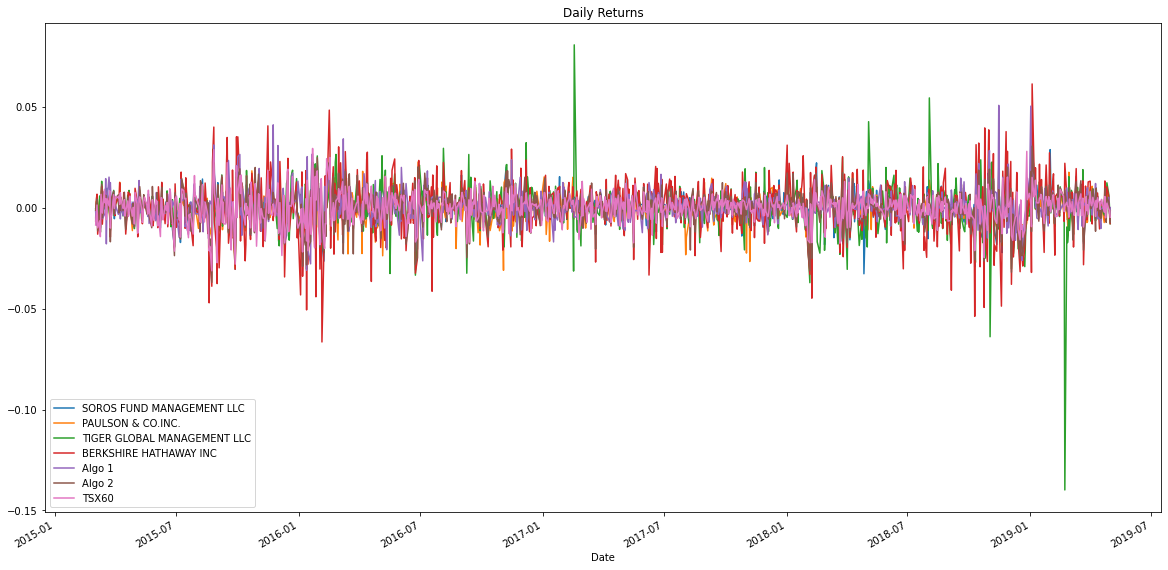

In [15]:
# Plot daily returns of all portfolios

combined_daily_returns = joined_data_rows
combined_daily_returns.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

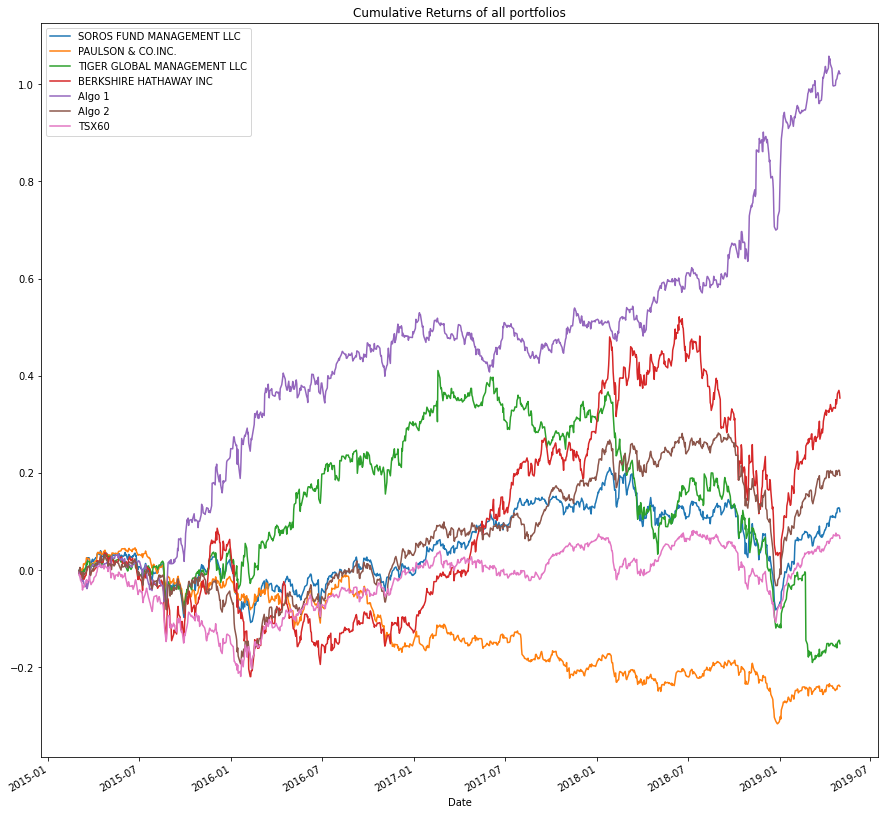

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1 
cumulative_returns.dropna(inplace=True)
#cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,15), title="Cumulative Returns of all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

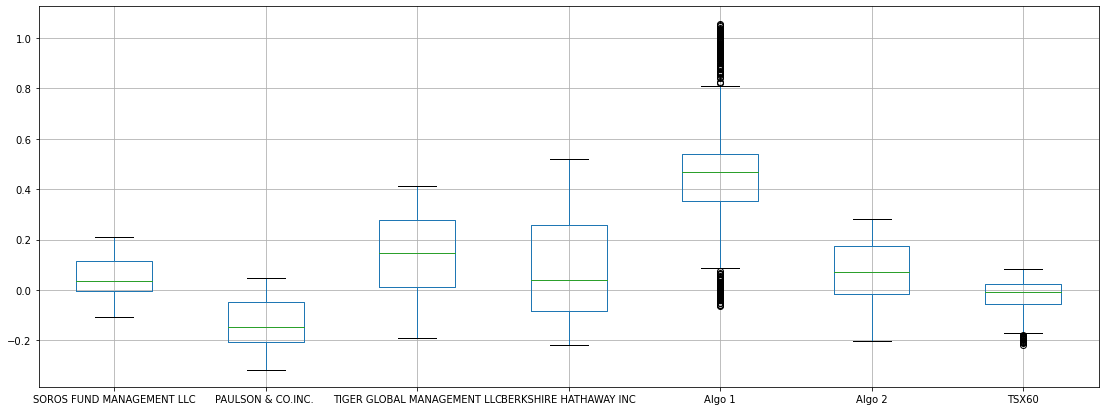

In [57]:
# Box plot to visually show risk

# Whale returns box plot
#whale_df.plot.box()

# algo returns box plot
#algo_df.plot.box()

# tsx60 returns box plot
#tsx_df.plot.box()

cumulative_returns.boxplot(figsize = (19,7))

### Calculate Standard Deviations

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX60                          0.007034
dtype: float64

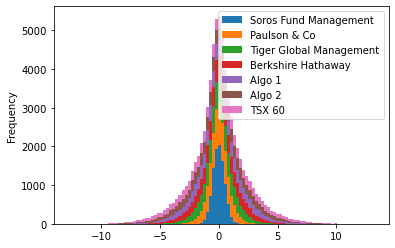

In [18]:
# Calculate the daily standard deviations of all portfolios


soros_std = np.random.normal(scale=0.50, size=10000)
paulson_std = np.random.normal(scale=1.00, size=10000)
tiger_std = np.random.normal(scale=1.50, size=10000)
berkshire_std = np.random.normal(scale=2.00, size=10000)
algo1_std = np.random.normal(scale=2.50, size=10000)
algo2_std = np.random.normal(scale=3.00, size=10000)
tsx_std = np.random.normal(scale=3.50, size=10000)

daily_std = pd.DataFrame({
    "Soros Fund Management": soros_std,
    "Paulson & Co": paulson_std,
    "Tiger Global Management": tiger_std,
    "Berkshire Hathaway": berkshire_std,
    "Algo 1": algo1_std,
    "Algo 2": algo2_std,
    "TSX 60": tsx_std
})


#plot
daily_std.plot.hist(stacked=True, bins=100)


#Daily standard deviations
daily_std = combined_daily_returns.std()
daily_std



### Determine which portfolios are riskier than the S&P TSX 60

In [53]:
# Calculate the daily standard deviation of S&P TSX 60

#combined_daily_returns['TSX60'].std()

# Determine which portfolios are riskier than the S&P TSX 60
# Sort portfolios in order of risk
daily_std = daily_std.sort_values(ascending=False)
daily_std

# portfolios above TSX60 are risker

### need to use an if statement with an f string to determine which is riskiest. 



BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
TSX60                          0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
TSX60                          0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

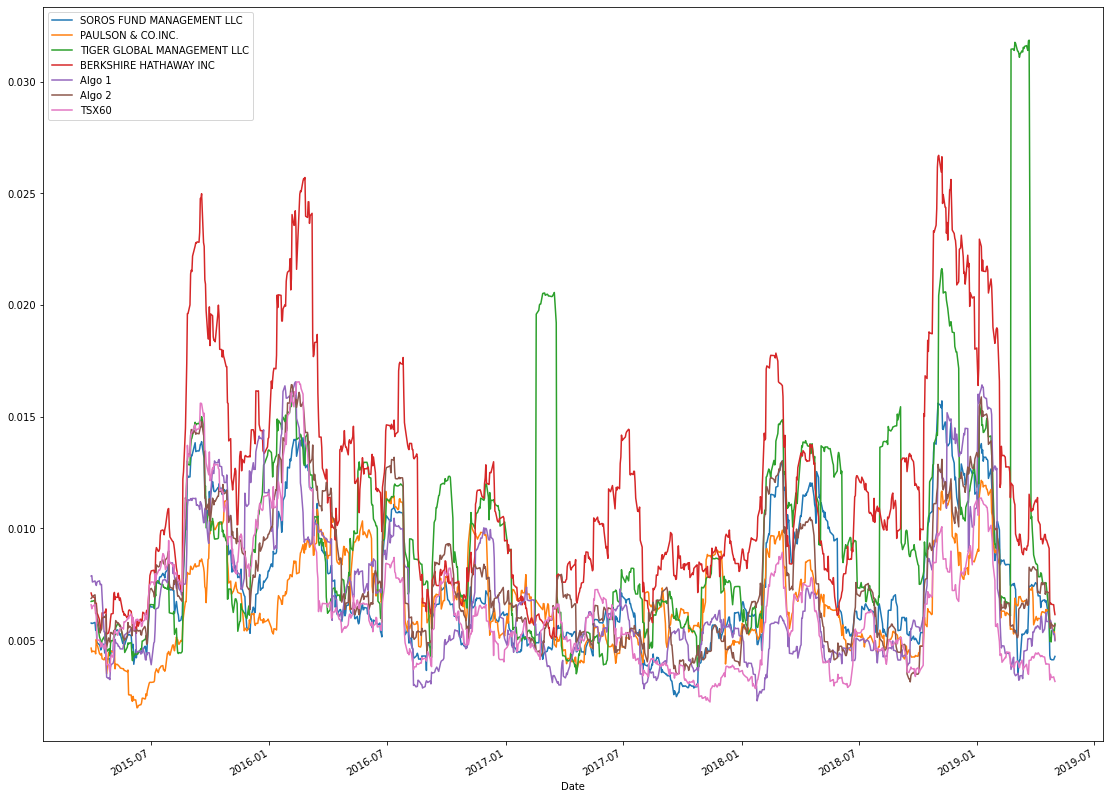

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_daily_returns.dropna(inplace=True)
combined_daily_returns.rolling(window=21).std().plot(figsize = (19,15))




### Calculate and plot the correlation

<AxesSubplot:>

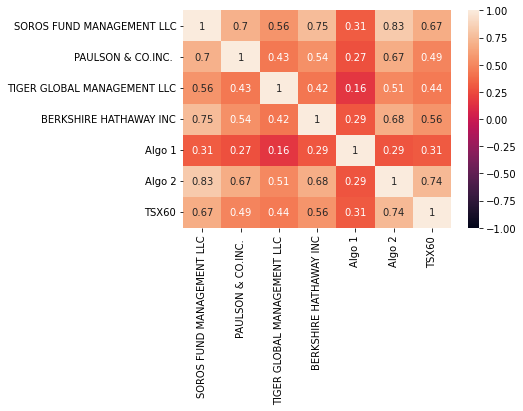

In [22]:
# Calculate the correlation
price_correlation = combined_daily_returns.corr()


# Display de correlation matrix

import seaborn as sns
sns.heatmap(price_correlation, vmin=-1, vmax=1, annot=True)




### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 and TSX 60'}, xlabel='Date'>

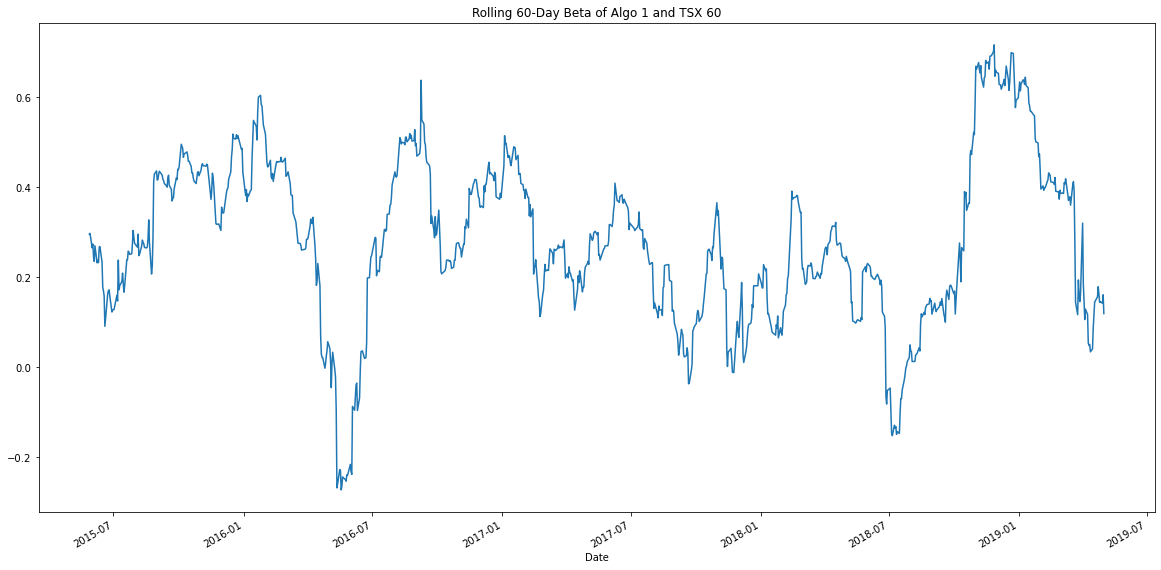

In [54]:
# Calculate covariance of a single portfolio
## covariance of Algo 1
#covariance = combined_daily_returns['Algo 1'].cov(combined_daily_returns['TSX60'])
#covariance

rolling_covariance = combined_daily_returns['Algo 1'].rolling(window=60).cov(combined_daily_returns['TSX60'])


# Calculate variance of S&P TSX
#variance = combined_daily_returns['TSX60'].var()
#variance

rolling_variance = combined_daily_returns['TSX60'].rolling(window=60).var()

# Computing beta
# Beta of Algo 1
# calculate and plot the 60-day rolling beta for it and the S&P TSX 60.


#Algo1_beta = covariance / variance
#Algo1_beta

rolling_beta = rolling_covariance / rolling_variance


# Plot beta trend
# Showcasing beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line

#sns.lmplot(x='Algo 1', y='TSX60', data=combined_daily_returns, aspect=1.5, fit_reg=True)

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 and TSX 60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

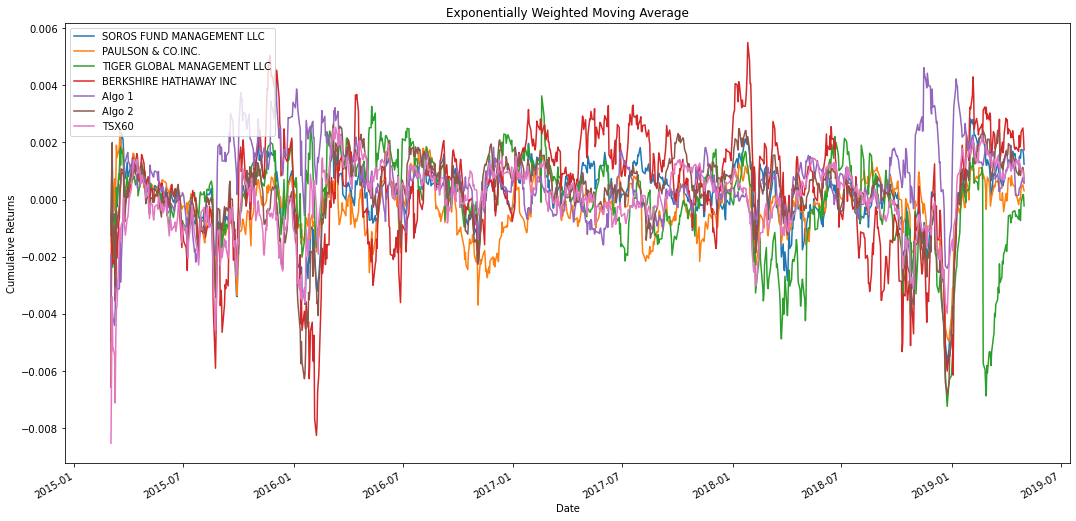

In [24]:
# Use `ewm` to calculate the rolling window

ewm_df = combined_daily_returns.copy()

# calculate EWM
ewm_df = ewm_df.ewm(halflife = '21 Days', times = ewm_df.index).mean()

# plot data
ewm_df.plot(title = "Exponentially Weighted Moving Average",
            ylabel = "Cumulative Returns",
            figsize = [18, 9]).legend(loc = 'upper left');


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

# first calculate combined_daily_returns standard deviation 
combined_daily_returns_std = combined_daily_returns.std()

sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns_std * np.sqrt(252))
sharpe_ratios






SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX60                          0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

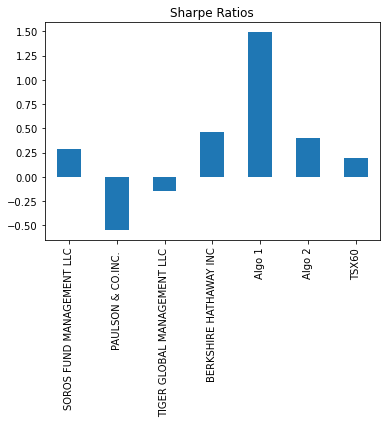

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!


Algo 1 has performend the best in terms of risk vs return. Berkshire Hathaway has a slightly better sharpe ratio than Algo 2. S&P TSX 60 underperformed both Algo portfolios, as well as Berkshire Hathaway and the Soros Fund. Paulson Fund Management and Tiger GLobal were the worst performers. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock = facebook (FB)

fb_df = Path("Resources/fb.csv")

#pase index as index and read as a true date
fb_df = pd.read_csv(fb_df, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Reset Date index 
fb_df.index = fb_df.index.normalize()

# Reorganize portfolio data by having a column per symbol
fb_df.rename(columns={'Close': 'Facebook'}, inplace=True)


# read first few lines to view file
fb_df.head()

,Facebook
Date,
2019-02-01,135.68
2019-03-01,131.74
2019-04-01,137.95
2019-07-01,138.05
2019-08-01,142.53


In [28]:
# Reading data from 2nd stock = Tesla (TSLA)

tsla_df = Path("Resources/tsla.csv")

#pase index as index and read as a true date
tsla_df = pd.read_csv(tsla_df, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Reset Date index 
tsla_df.index = tsla_df.index.normalize()

# Reorganize portfolio data by having a column per symbol
tsla_df.rename(columns={'Close': 'Tesla'}, inplace=True)

# read first few lines to view file
tsla_df.head()

,Tesla
Date,
2019-02-01,62.02
2019-03-01,60.07
2019-04-01,63.54
2019-07-01,66.99
2019-08-01,67.07


In [29]:
# Reading data from 3rd stock = Apple (AAPL)

aapl_df = Path("Resources/aapl.csv")

#pase index as index and read as a true date
aapl_df = pd.read_csv(aapl_df, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Reset Date index 
aapl_df.index = aapl_df.index.normalize()

# Reorganize portfolio data by having a column per symbol
aapl_df.rename(columns={'Close': 'Apple'}, inplace=True)

# read first few lines to view file
aapl_df.head()

,Apple
Date,
2019-02-01,39.48
2019-03-01,35.55
2019-04-01,37.07
2019-07-01,36.98
2019-08-01,37.69


In [30]:
# Combine all stocks in a single DataFrame
custom_portfolio_joined = pd.concat(
    [fb_df, tsla_df, aapl_df], axis="columns", join="inner"
)

custom_portfolio_joined.head()
custom_portfolio_joined.copy()



,Facebook,Tesla,Apple
Date,,,
2019-02-01,135.68,62.02,39.48
2019-03-01,131.74,60.07,35.55
2019-04-01,137.95,63.54,37.07
2019-07-01,138.05,66.99,36.98
2019-08-01,142.53,67.07,37.69
...,...,...,...
2020-06-23,242.24,200.36,91.63
2020-06-24,234.02,192.17,90.02
2020-06-25,235.68,197.20,91.21


In [31]:
# Calculate daily returns
custom_portfolio_returns = custom_portfolio_joined.pct_change()

# Drop NAs
custom_portfolio_returns = custom_portfolio_returns.dropna().copy()
custom_portfolio_returns.dropna(inplace=True)

# Display sample data
custom_portfolio_returns.head()


,Facebook,Tesla,Apple
Date,,,
2019-03-01,-0.029039,-0.031441,-0.099544
2019-04-01,0.047138,0.057766,0.042757
2019-07-01,0.000725,0.054297,-0.002428
2019-08-01,0.032452,0.001194,0.019200
2019-09-01,0.011927,0.009542,0.016981


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
combined_custom_returns = custom_portfolio_returns.dot(weights)

# normalise Date as index
combined_custom_returns.index.name = 'Date'
combined_custom_returns.index = combined_custom_returns.index.normalize()

# Display sample data
combined_custom_returns.head()

Date
2019-03-01   -0.053341
2019-04-01    0.049220
2019-07-01    0.017531
2019-08-01    0.017615
2019-09-01    0.012817
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
# Join your returns DataFrame to the original returns DataFrame

all_portfolios = pd.concat(
    [combined_daily_returns, combined_custom_returns], axis="columns", join="inner"
)

# give custom portfolio a name

all_portfolios.columns.values[7] = 'Custom Portfolio'

all_portfolios.head()
all_portfolios.copy()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60,Custom Portfolio
Date,,,,,,,,
2019-01-02,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.001697,0.003847
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368,-0.020975
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048,0.017402
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373,0.011650
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965,-0.020464
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.009322
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.002297
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.021437


In [34]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_portfolios.dropna(inplace=True)
all_portfolios.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
TSX60                          0
Custom Portfolio               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized `std`
new_annualized_std = all_portfolios * np.sqrt(252)
new_annualized_std




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX60,Custom Portfolio
Date,,,,,,,,
2019-01-02,0.095669,0.244929,0.125103,-0.024661,0.799158,0.286091,0.026933,0.061062
2019-01-03,-0.124580,-0.117523,-0.134579,-0.508824,0.242024,-0.187190,-0.148719,-0.332974
2019-01-04,0.474353,0.429114,0.532754,0.973762,0.279739,0.484318,0.238876,0.276255
2019-01-07,0.143687,0.229776,0.224007,0.272800,0.234120,0.268952,0.085289,0.184937
2019-01-08,0.170806,0.127792,0.024507,0.092889,0.171840,0.166349,0.110565,-0.324860
...,...,...,...,...,...,...,...,...
2019-04-24,0.036256,0.016011,-0.063496,-0.101371,0.017386,0.006337,-0.078928,-0.147981
2019-04-25,-0.004522,-0.020491,-0.081804,0.076956,0.010834,-0.115050,-0.009973,0.036465
2019-04-26,0.129369,0.145437,0.196127,0.165633,0.047324,0.083431,0.035779,-0.340295


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

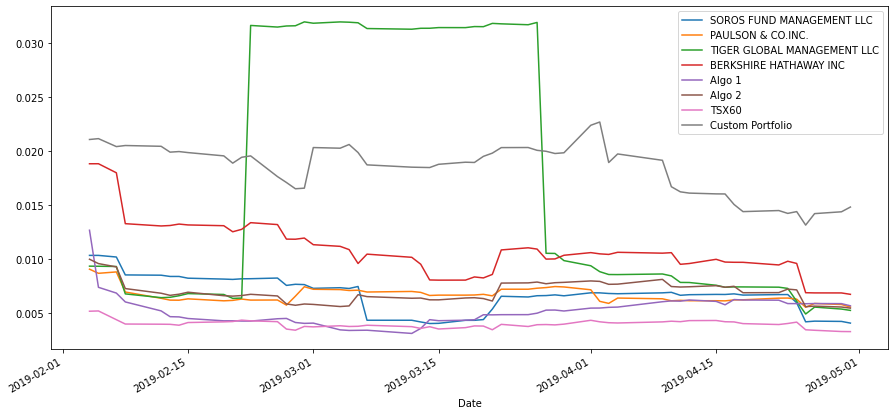

In [44]:
# Calculate rolling standard deviation
all_portfolios.dropna(inplace=True)



# Plot rolling standard deviation
all_portfolios.rolling(window=21).std().plot(figsize = (15,7))



### Calculate and plot the correlation

<AxesSubplot:>

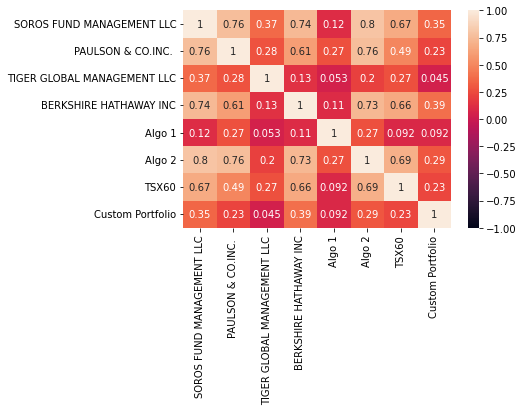

In [45]:
# Calculate the correlation
new_price_correlation = all_portfolios.corr()


# Display de correlation matrix

import seaborn as sns
sns.heatmap(new_price_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio and TSX 60'}, xlabel='Date'>

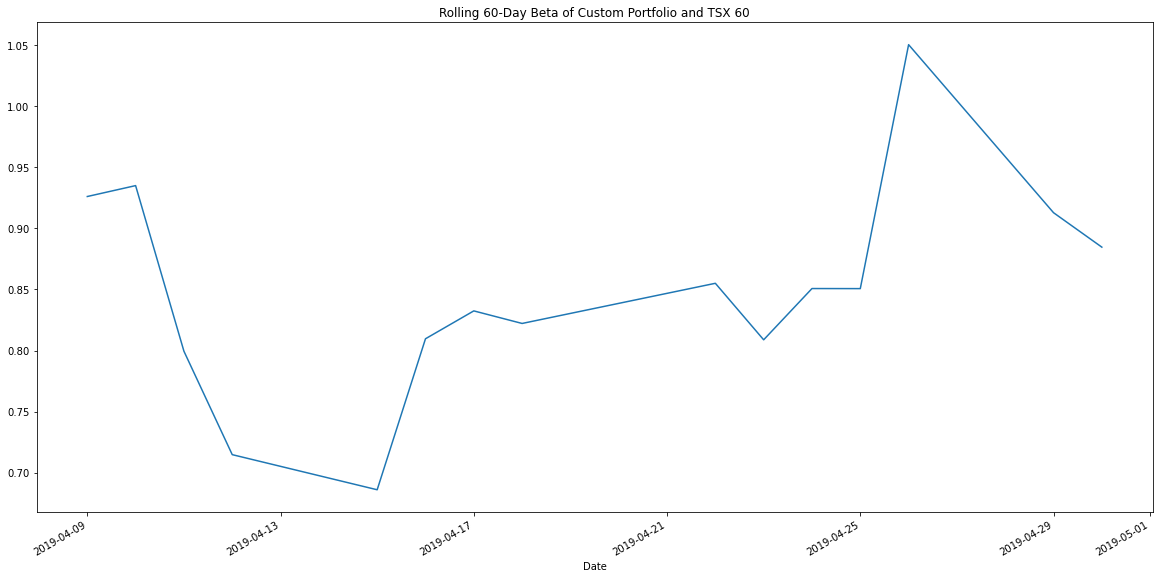

In [51]:
# Calculate and plot Beta

new_rolling_covariance = all_portfolios['Custom Portfolio'].rolling(window=60).cov(all_portfolios['TSX60'])

new_rolling_variance = all_portfolios['TSX60'].rolling(window=60).var()

new_rolling_beta = new_rolling_covariance / new_rolling_variance

new_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Portfolio and TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios

# first calculate standard deviation of all_portfolios

all_portfolios_std = all_portfolios.std()

new_sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios_std * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.517449
PAULSON & CO.INC.              2.425140
TIGER GLOBAL MANAGEMENT LLC   -0.291651
BERKSHIRE HATHAWAY INC         4.031112
Algo 1                         3.789381
Algo 2                         4.626860
TSX60                          6.300490
Custom Portfolio               1.099268
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

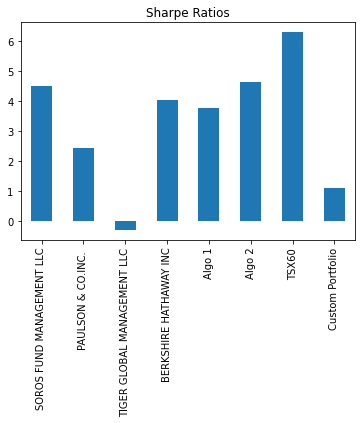

In [50]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot.bar(title="Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [ ]:
# Given the selected timeframe, the new custom portfolio is the second worst performing portfolio in terms of risk adjusted return. Only the Tiger Global fund performs worse. The TSX 60 is still the best performer. 